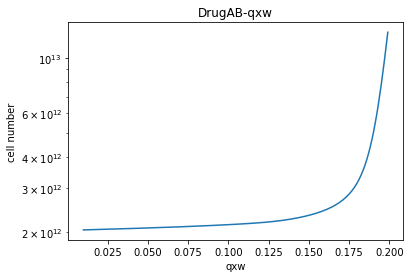

In [1]:
#!/usr/bin/python

import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt
import matplotlib as mpl

def dyna(x, t, *arg):
    (qxw, pxw, qzw, pzw, qzx, pzx, qzy, pzy, a, b, c, f, g, h, k, p, q ) = arg
    dw = ((qxw*(x[1]/(x[0]+α)))/(pxw+(x[1]/(x[0]+α))) + ((qzw*(x[3]/(x[0]+α)))/(pzw+(x[3]/(x[0]+α))))+a)*x[0] 
    dx = g*x[0] + (((qzx*(x[3]/(x[1]+α)))/(pzx+(x[3]/(x[1]+α))))+b)*x[1]
    dy = h*x[0] + (((qzy*(x[3]/(x[2]+α)))/(pzy+(x[3]/(x[2]+α))))+c)*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz])

def dynb(x, t, *arg):
    (qyw, pyw, qzw, pzw, qzx, pzx, qzy, pzy, a, b, c, f, g, h, k, p, q ) = arg
    dw = ((qyw*(x[2]/(x[0]+α)))/(pyw+(x[2]/(x[0]+α))) + ((qzw*(x[3]/(x[0]+α)))/(pzw+(x[3]/(x[0]+α))))+a)*x[0] 
    dx = g*x[0] + (((qzx*(x[3]/(x[1]+α)))/(pzx+(x[3]/(x[1]+α))))+b)*x[1]
    dy = h*x[0] + (((qzy*(x[3]/(x[2]+α)))/(pzy+(x[3]/(x[2]+α))))+c)*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz])

α = 0.00000001

initial_N = 10**9
X = 10**4
Y = 10**4
Z = 10
W = initial_N-X-Y-Z

t_end = 1000
tan = 307

list_t = np.arange(0, tan, 0.01) 
list_t1 = np.arange(tan, t_end, 0.01) 

# qxw = 0.08
pxw = 0.0009
qyw = 0.08
pyw = 0.0009

qzwA = 0.06
qzwB = 0.06
pzwA = 0.0009
pzwB = 0.0009
qzxA = 0.07
qzxB = 0.07
pzxA = 0.0009
pzxB = 0.0009
qzyA = 0.007
qzyB = 0.007
pzyA = 0.0009
pzyB = 0.0009

aA = -0.17
bA = 0.008
cA = -0.137

aB = -0.321
bB = -0.187
cB = 0.0203

fA = 0.022
fB = 0.022
gA = 0.0000001
gB = 0.0000001
hA = 0.0000001 
hB = 0.0000001 
kA = 0.0000001 
kB = 0.0000001 
pA = 0.0000001 
pB = 0.0000001 
qA = 0.0000001
qB = 0.0000001

x = list()
finalnumber = list()

for qxw in np.arange(0.01, 0.2, 0.001):
    x.append(qxw)
    paramsA = (qxw, pxw, qzwA, pzwA, qzxA, pzxA, qzyA, pzyA, aA, bA, cA, fA, gA, hA, kA, pA, qA )
    paramsB = (qyw, pyw, qzwB, pzwB, qzxB, pzxB, qzyB, pzyB, aB, bB, cB, fB, gB, hB, kB, pB, qB )
    cell_init = (W,X,Y,Z)
    cell_init = (W,X,Y,Z)
    cells = odeint(dyna, cell_init, list_t, args = paramsA)
    celltotal = cells[:, 0] + cells[:, 1] + cells[:, 2] + cells[:, 3]
    i = len(list_t)-1
    cell1_init = [cells[i, 0], cells[i, 1], cells[i, 2], cells[i, 3]]
    cell1 = odeint(dynb, cell1_init, list_t1, args = paramsB)
    celltotal1 = cell1[:, 0] + cell1[:, 1] + cell1[:, 2] + cell1[:, 3]
    finalnumber.append(celltotal1[-1])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(x, finalnumber)
# ax.set_ylim(1, 10**17)
ax.set_xlabel('qxw')
ax.set_ylabel('cell number')
ax.set_title('DrugAB-qxw')

plt.show()